In [1]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
import logging
from funs import *
from pyod.models.ocsvm import OCSVM

log("START",level = ("start","Local_Outlier_Factor"))

Local_Outlier_Factor



<div style="margin-left: 38px; font-size: 30px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 20px; line-height: 1.6;">
    <div>Impot danych z wcześniejszego parsowania w Anomaly_detect_ML</div>
</div>

In [6]:
df_1_scaled = pd.read_hdf('parsed_data/segmented_CICIDS2017.h5', key='df_1_scaled')
df_scaled = pd.read_hdf('parsed_data/merged_CICIDS2017.h5', key='df_scaled')
df_labels = pd.read_hdf('parsed_data/merged_CICIDS2017.h5', key='df_labels')
df_scaled_result_check_test = pd.read_hdf('parsed_data/IF_segmented_CICIDS2017.h5', key='df_2_scaled_result_check')
df_1_scaled = df_1_scaled.sample(n=100_000, random_state=42).reset_index(drop=True)
print(len(df_1_scaled))

100000


<div style="margin-left: 38px; font-size: 30px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 20px; line-height: 1.6;">
    <div>Treming modelu</div>
</div>

In [ ]:
LOF= LocalOutlierFactor(
    n_neighbors=50,
    algorithm='auto',
    leaf_size=30,
    metric='minkowski',
    p=2,
    metric_params=None,
    contamination='auto',
    novelty=True,
    n_jobs=None
)
LOF.fit(df_1_scaled)

<div style="margin-left: 38px; font-size: 30px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 20px; line-height: 1.6;">
    <div>Test modelu</div>
</div>

/root/Anomaly_Detection/venv_AD/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/root/Anomaly_Detection/venv_AD/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Local_Outlier_Factor
Detection distribution anomaly/normal: 35.6408% / 64.3592%
!!! Wyniki pokazuje dopasowanie contamination (wyciagania wnioskow z gotowego produktu pracy modelu) NIE DCHYLENIA NORMALNY/ANOMALYJNY ruch sieciowy !!!
Anomaly detected: 597693
Normal traffic: 1079300


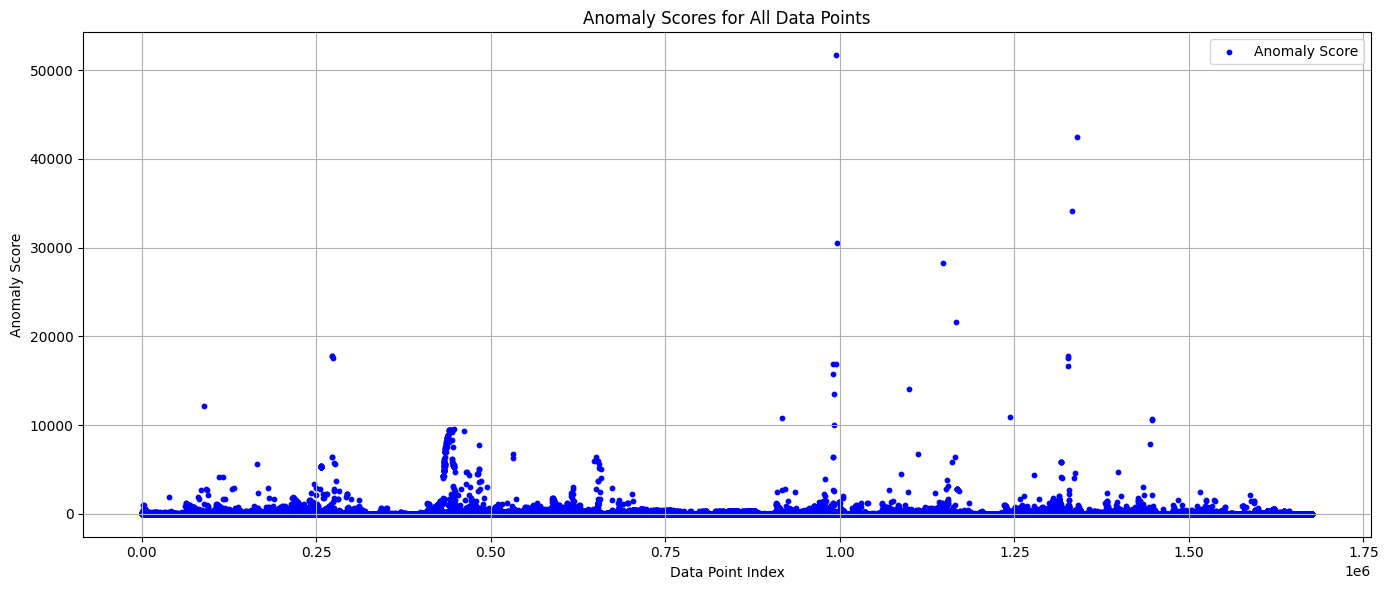

Local_Outlier_Factor
Number of flows in df_test: 1676993
Correct data: 
Real number of anomalies in df_test: 335370
Procentage of anomlys in dataset: 19.9983%
Predicted data: 
Number of DETECTED anomalies in df_test: 597693
Procentage of anomlys in dataset: 35.6408%

Number of correct predictions(TP): 298169
Number of wrong predyctions(FP): 299524
Accuracy of predictions: 79.9209%
Sensitivity of predictions: 88.9075%
Precision of predictions: 49.8866%
F - mesure - harmonic-mean of precision and sensitivity: 63.9119%


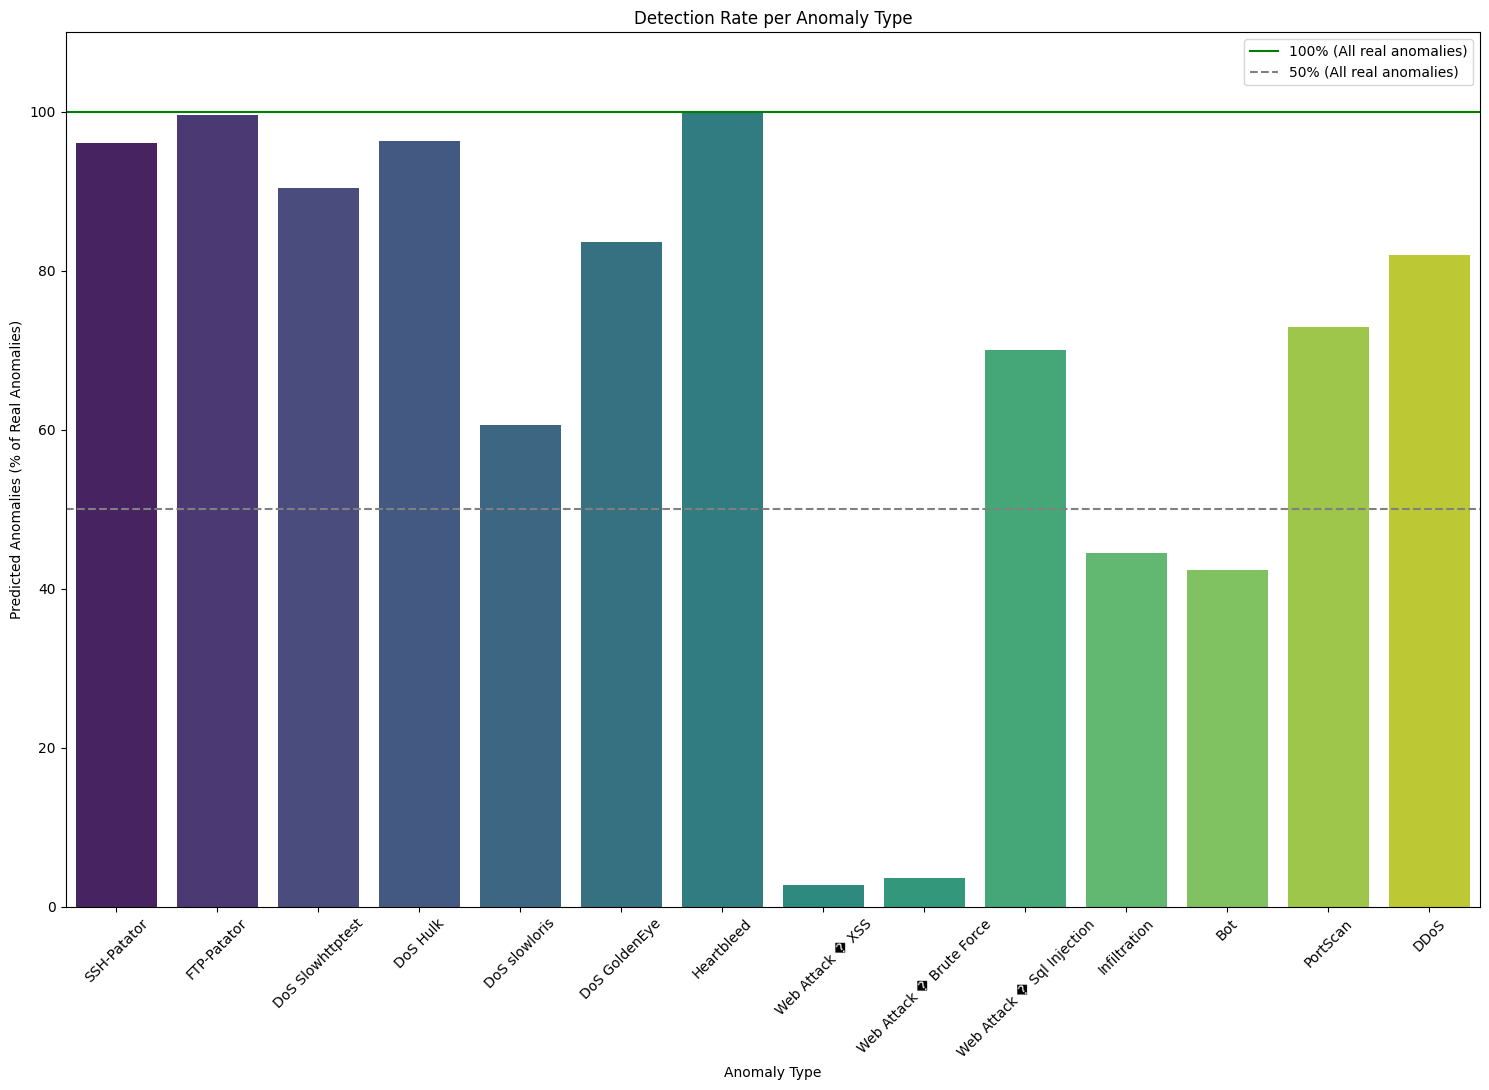

Detection rate by attack type:
Name: SSH-Patator, Detected: 96.0355%
Name: FTP-Patator, Detected: 99.5953%
Name: DoS Slowhttptest, Detected: 90.4343%
Name: DoS Hulk, Detected: 96.278%
Name: DoS slowloris, Detected: 60.5537%
Name: DoS GoldenEye, Detected: 83.5716%
Name: Heartbleed, Detected: 100.0%
Name: Web Attack � XSS, Detected: 2.7607%
Name: Web Attack � Brute Force, Detected: 3.5739%
Name: Web Attack � Sql Injection, Detected: 70.0%
Name: Infiltration, Detected: 44.4444%
Name: Bot, Detected: 42.3336%
Name: PortScan, Detected: 72.9589%
Name: DDoS, Detected: 82.0237%


In [6]:
df_scaled_result_check = test_LOF_model(LOF,df_scaled,df_labels, name="df_test")

<div style="margin-left: 38px; font-size: 30px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 20px; line-height: 1.6;">
    <div>Other model tests</div>
</div>

In [3]:
model_OCSVM = OCSVM(
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    tol=1e-2,
    nu=0.5,
    shrinking=False,       # Equivalent to -h 0 in LibSVM
    cache_size=200,
    verbose=True,
    max_iter=-1
)

model_OCSVM.fit(df_1_scaled)

[LibSVM]...................................*
optimization finished, #iter = 35262
obj = 425993640.156981, rho = 24399.793402
nSV = 50001, nBSV = 49998


OCSVM(cache_size=200, coef0=0.0, contamination=0.1, degree=3, gamma='scale',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=False, tol=0.01,
   verbose=True)

OCSVM
Detection distribution anomaly/normal: 10.0000% / 90.0000%
!!! Wyniki pokazuje dopasowanie contamination (wyciagania wnioskow z gotowego produktu pracy modelu) NIE DCHYLENIA NORMALNY/ANOMALYJNY ruch sieciowy !!!
Anomaly detected: 10000
Normal traffic: 90000


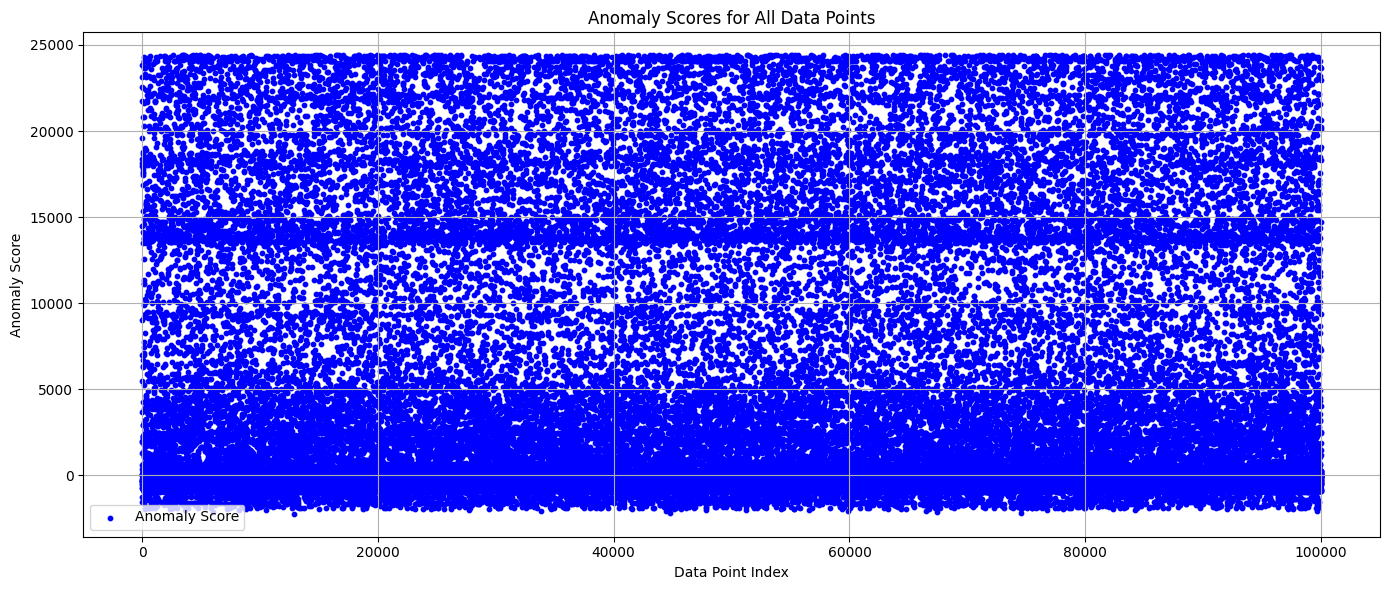

OCSVM
Number of flows in df: 1676993
Correct data: 
Real number of anomalies in df: 335370
Procentage of anomlys in dataset: 19.9983%
Predicted data: 
Number of DETECTED anomalies in df: 10000
Procentage of anomlys in dataset: 0.5963%

Number of correct predictions(TP): 228
Number of wrong predyctions(FP): 9772
Accuracy of predictions: 79.4326%
Sensitivity of predictions: 0.0680%
Precision of predictions: 2.2800%
F - mesure - harmonic-mean of precision and sensitivity: 0.1320%


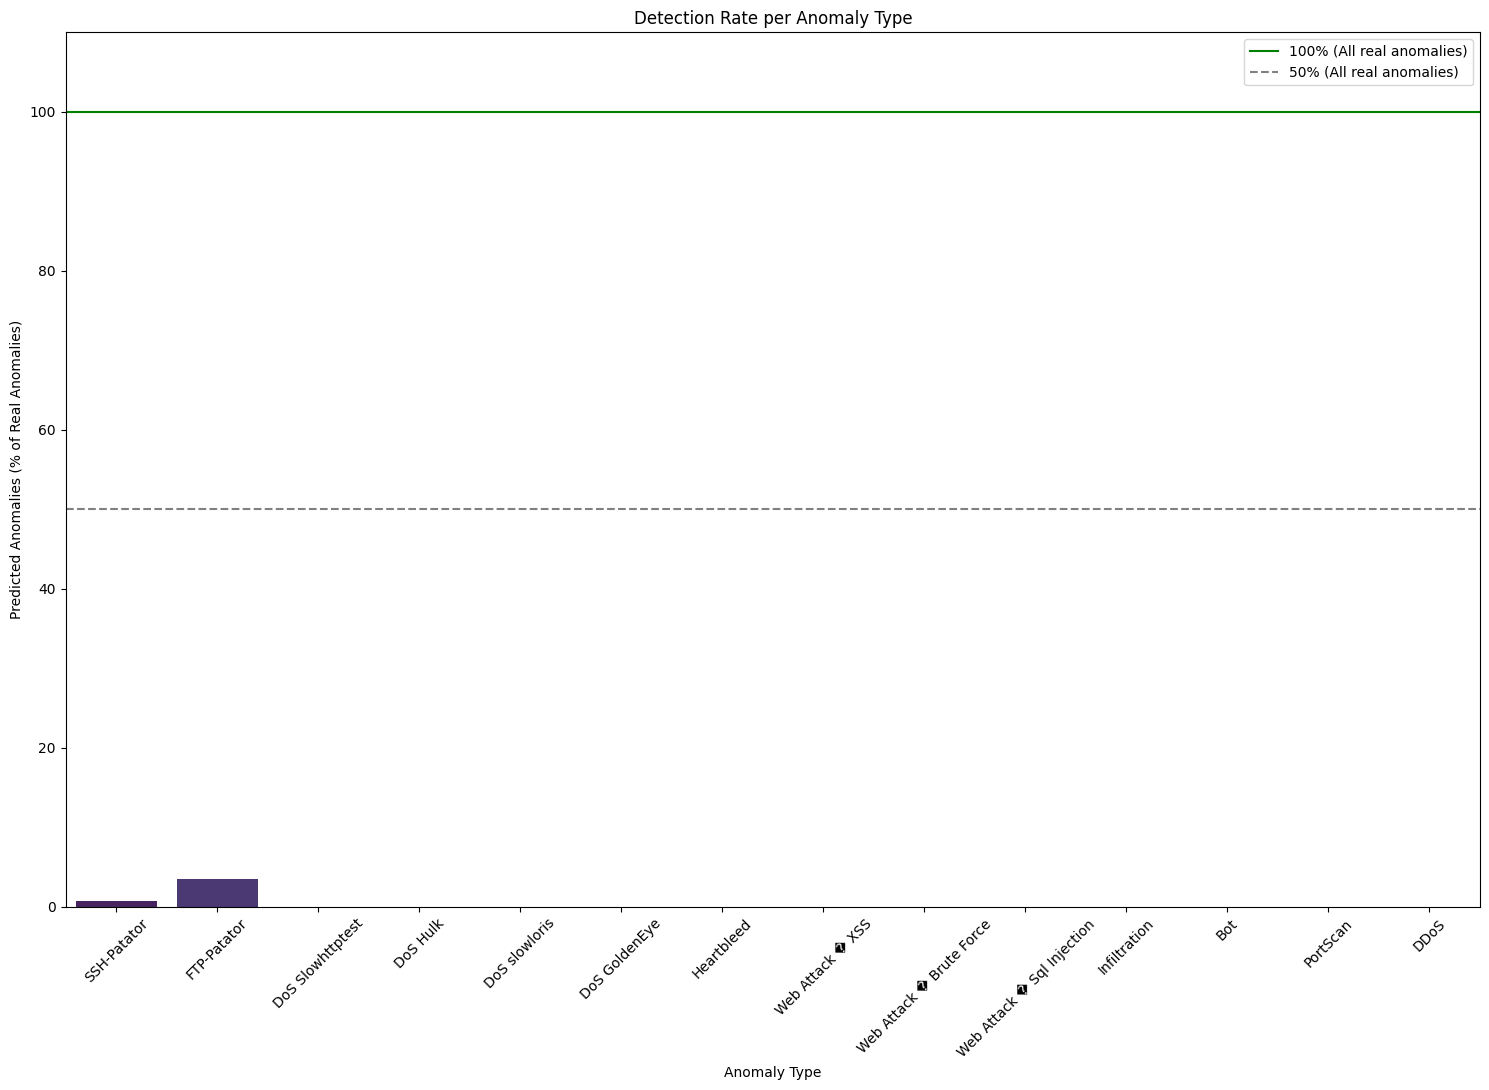

Detection rate by attack type:
Name: SSH-Patator, Detected: 0.6977%
Name: FTP-Patator, Detected: 3.4733%
Name: DoS Slowhttptest, Detected: 0.0%
Name: DoS Hulk, Detected: 0.0%
Name: DoS slowloris, Detected: 0.0%
Name: DoS GoldenEye, Detected: 0.0%
Name: Heartbleed, Detected: 0.0%
Name: Web Attack � XSS, Detected: 0.0%
Name: Web Attack � Brute Force, Detected: 0.0%
Name: Web Attack � Sql Injection, Detected: 0.0%
Name: Infiltration, Detected: 0.0%
Name: Bot, Detected: 0.0%
Name: PortScan, Detected: 0.0%
Name: DDoS, Detected: 0.0%


,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Flow Bytes/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Repetition num,prediction,anomaly_score,Label
0,-0.423305,-0.011890,-0.010368,-0.096974,-0.007691,-0.491089,-0.594120,-0.621926,-0.455023,-0.614543,...,-0.067410,-0.243872,-0.295562,-0.358510,-0.081799,-0.413509,-0.018815,1.0,-538.077116,BENIGN
1,-0.423305,-0.011890,-0.010368,-0.096974,-0.007691,-0.491089,-0.594120,-0.621926,-0.455023,-0.614543,...,-0.067410,-0.243871,-0.295562,-0.358510,-0.081798,-0.413509,0.859106,-1.0,21748.002026,BENIGN
2,-0.423305,-0.011890,-0.010368,-0.096974,-0.007691,-0.491089,-0.594120,-0.621926,-0.455023,-0.614543,...,-0.067410,-0.243871,-0.295562,-0.358510,-0.081798,-0.413509,10.516231,1.0,-232.666186,BENIGN
3,-0.423305,-0.011890,-0.010368,-0.096974,-0.007691,-0.491089,-0.594120,-0.621926,-0.455023,-0.614543,...,-0.067410,-0.243871,-0.295562,-0.358510,-0.081798,-0.413509,-0.018815,-1.0,22551.250606,SSH-Patator
4,-0.423305,-0.011890,-0.010368,-0.095018,-0.007691,-0.463207,-0.242892,-0.482910,-0.455023,-0.614543,...,2.611001,-0.243871,-0.295562,-0.358510,-0.081798,-0.413509,0.098241,-1.0,23845.670894,FTP-Patator
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676988,3.287573,-0.007018,-0.008145,-0.073635,-0.007180,-0.194351,-0.594120,-0.345549,-0.089969,1.192017,...,-0.067407,2.137023,5.507408,7.233581,-0.081791,3.316056,-0.018815,NaN,NaN,BENIGN
1676989,3.287574,-0.007018,-0.008145,-0.073635,-0.007180,-0.194351,-0.594120,-0.345549,-0.089969,1.194327,...,-0.067407,2.137023,5.507408,7.233581,-0.081788,3.316056,-0.018815,NaN,NaN,BENIGN
1676990,3.287607,0.017342,0.006677,0.595811,-0.006864,0.251751,-0.443594,0.965870,0.675734,-0.376594,...,-0.067398,0.153937,0.288889,0.255969,-0.081797,3.316056,-0.018815,NaN,NaN,BENIGN
1676991,3.287620,0.005649,0.001490,0.096312,-0.005775,0.367260,-0.594120,0.100854,0.523863,1.652898,...,-0.067398,0.369893,0.380430,0.274164,-0.081787,3.316056,-0.018815,NaN,NaN,BENIGN


In [7]:
test_OCSVM_model_2(model_OCSVM, df_scaled, df_labels, name="df", level=["start", "OCSVM"])